In [ ]:
#Mount Google Drive within Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Split the dataset into desired subset
import os, shutil, pathlib, random

new_base_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")

original_train_dir = new_base_dir / "train"
subset_train_dir = new_base_dir / "train_subset"

original_validation_dir = new_base_dir / "validation"
subset_validation_dir = new_base_dir / "validation_subset"

original_test_dir = new_base_dir / "test"
subset_test_dir = new_base_dir / "test_subset"

# Eliminate exist subset dataset
if os.path.exists(subset_train_dir):
    shutil.rmtree(subset_train_dir)
if os.path.exists(subset_validation_dir):
    shutil.rmtree(subset_validation_dir)
if os.path.exists(subset_test_dir):
    shutil.rmtree(subset_test_dir)

# Create a new folder for each subsets
os.makedirs(subset_train_dir / "dogs", exist_ok=True)
os.makedirs(subset_train_dir / "cats", exist_ok=True)

os.makedirs(subset_validation_dir / "dogs", exist_ok=True)
os.makedirs(subset_validation_dir / "cats", exist_ok=True)

os.makedirs(subset_test_dir / "dogs", exist_ok=True)
os.makedirs(subset_test_dir / "cats", exist_ok=True)

# Link a path of each subsets to its original file
dog_dir_train = original_train_dir / "dogs"
cat_dir_train = original_train_dir / "cats"

dog_dir_validation = original_validation_dir / "dogs"
cat_dir_validation = original_validation_dir / "cats"

dog_dir_test = original_test_dir / "dogs"
cat_dir_test = original_test_dir / "cats"

# Randomly choose 750 data from each cats and dogs folder from the trainset
random_dogs_train = random.sample(os.listdir(dog_dir_train), 750)
random_cats_train = random.sample(os.listdir(cat_dir_train), 750)

# Randomly choose 250 data from each cats and dogs folder from the validationset
random_dogs_validation = random.sample(os.listdir(dog_dir_validation), 250)
random_cats_validation = random.sample(os.listdir(cat_dir_validation), 250)

# Randomly choose 250 data from each cats and dogs folder from the testset
random_dogs_test = random.sample(os.listdir(dog_dir_test), 250)
random_cats_test = random.sample(os.listdir(cat_dir_test), 250)

# Copy pictures to each folders above
#Training set
for fname in random_dogs_train:
    src = dog_dir_train / fname
    dst = subset_train_dir / "dogs" / fname
    shutil.copyfile(src, dst)

for fname in random_cats_train:
    src = cat_dir_train / fname
    dst = subset_train_dir / "cats" / fname
    shutil.copyfile(src, dst)

#Validation set
for fname in random_dogs_validation:
    src = dog_dir_validation / fname
    dst = subset_validation_dir / "dogs" / fname
    shutil.copyfile(src, dst)

for fname in random_cats_validation:
    src = cat_dir_validation / fname
    dst = subset_validation_dir / "cats" / fname
    shutil.copyfile(src, dst)

#Test set
for fname in random_dogs_test:
    src = dog_dir_test / fname
    dst = subset_test_dir / "dogs" / fname
    shutil.copyfile(src, dst)

for fname in random_cats_test:
    src = cat_dir_test / fname
    dst = subset_test_dir / "cats" / fname
    shutil.copyfile(src, dst)


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    directory=subset_train_dir,
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    directory=subset_validation_dir,
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    directory=subset_test_dir,
    image_size=(180, 180),
    batch_size=32
)


Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Leveraging a pretrained model
#Feature extraction with a pretrained model
#Instantiating the VGG16 convolutional base
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fast feature extraction without data augmentation
#Extracting the VGG16 features and corresponding labels
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━

In [ ]:
train_features.shape

(1500, 5, 5, 512)

In [ ]:
#Defining and training the densely connected classifier
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.8)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8132 - loss: 33.8368 - val_accuracy: 0.9520 - val_loss: 7.0120
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9622 - loss: 4.8467 - val_accuracy: 0.9760 - val_loss: 2.2089
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9692 - loss: 4.4027 - val_accuracy: 0.9720 - val_loss: 2.6949
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9760 - loss: 3.0038 - val_accuracy: 0.9700 - val_loss: 3.9047
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9853 - loss: 1.9276 - val_accuracy: 0.9740 - val_loss: 2.7945
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9860 - loss: 1.9570 - val_accuracy: 0.9720 - val_loss: 3.5346
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9796 - loss: 2.5928 - val_accuracy: 0.9680 - val_loss: 5.8706
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9883 - loss: 1.4243 - val_accuracy: 0.9700 - 

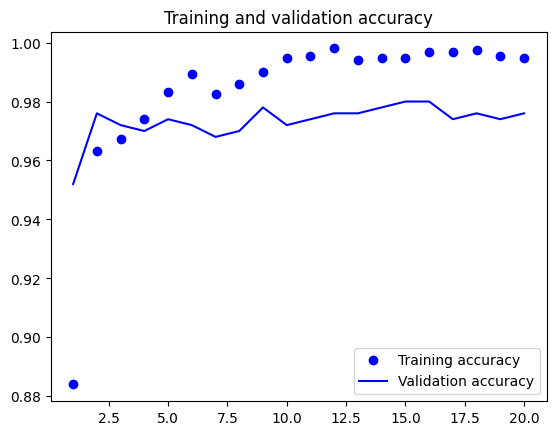

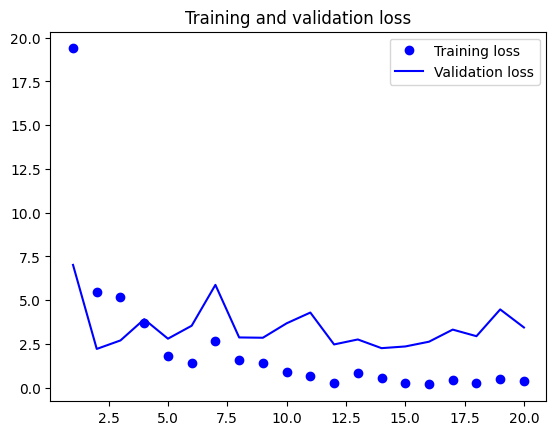

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
#Feature extraction together with data augmentation
#Instantiating and freezing the VGG16 convolutional base
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [ ]:
#Printing the list of trainable weights before and after freezing
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [ ]:
#Adding a data augmentation stage and a classifier to the convolutional base
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.8)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 827s 18s/step - accuracy: 0.7892 - loss: 38.5249 - val_accuracy: 0.9700 - val_loss: 3.1221
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 848s 17s/step - accuracy: 0.9298 - loss: 8.3120 - val_accuracy: 0.9720 - val_loss: 3.0820
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 808s 17s/step - accuracy: 0.9475 - loss: 7.5146 - val_accuracy: 0.9660 - val_loss: 4.3127
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 865s 17s/step - accuracy: 0.9401 - loss: 8.5880 - val_accuracy: 0.9680 - val_loss: 4.3522
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 862s 17s/step - accuracy: 0.9405 - loss: 10.8827 - val_accuracy: 0.9740 - val_loss: 4.0414


In [ ]:
#Evaluating the model on the test set
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 199s 12s/step - accuracy: 0.9643 - loss: 5.9687
Test accuracy: 0.970


In [ ]:
#Fine-tuning a pretrained model
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
#Freezing all layers until the fourth from the last
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
#Fine-tuning the model
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 962s 21s/step - accuracy: 0.9616 - loss: 4.0464 - val_accuracy: 0.9680 - val_loss: 3.8321
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 954s 20s/step - accuracy: 0.9673 - loss: 2.9209 - val_accuracy: 0.9680 - val_loss: 2.8474
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1040s 21s/step - accuracy: 0.9752 - loss: 1.1921 - val_accuracy: 0.9720 - val_loss: 2.2289
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 974s 20s/step - accuracy: 0.9717 - loss: 1.1978 - val_accuracy: 0.9760 - val_loss: 1.8917
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1039s 21s/step - accuracy: 0.9759 - loss: 1.0535 - val_accuracy: 0.9720 - val_loss: 1.6390


In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 214s 13s/step - accuracy: 0.9680 - loss: 4.0477
Test accuracy: 0.972
